# Data Science Group Project
## Transport NSW Train Analysis 2016-21
### Group 51
Thuseevan Nareshkumar 46328785 <br>
Ryan Lam 45951292<br>
Md Fahad Rahman 45728836 <br> 
Hanando Isbell 47101164


# Introduction
 Transport Performance and Analytics (TPA) is a center of excellence that provides objective and trustworthy transportation data, recommendations, and an analysis. TPA brings to offer an evidence foundation for strategic decision-making in support of an efficient transportation system. 
Gathering data from their archives, the following project is built puttiing emphasis on diifferent analysis of uses of transport throughout Sydney. 

# Project Goal
**"How the dataset can be used in analysing different aspects of transportation?"**

By providing various analysis to  the question is our following goals:
- Explore with our chosen dataframe.
- Take advantage of the various sources to reach an optimal conclusion that will help with either decision making/support.
- Provide analysis that will enable us to correlate trends/patterns withreal world activities which will include:
  - Distinction between an array of transportation rush hours
  - In which month people travel more
  - Analysis through several linear Regresion. 

# Data source
The dataset is from the Bureau of Transport Statistics. This dataset contains NSW trains official train utilisation figures for Intercity train lines only. These figures include the data of passengers who on/tap off well as passeners who bought tickets when entering and exiting the transportation service stations. It is set out as a line and aggregated into a monthly figure for a passenger for their estimated times of travel during that month. 
The data was collected from opal train trips by month,line and card type, from July 2016 to August 2021. The format of the data set is in CSV. Here is a link to the relevant document page: https://opendata.transport.nsw.gov.au/dataset/opal-trips-train.

<b>Note<b>: There were limited amount of data provided for several months in the year 2016 and 2021.

## Importing Libraries


In [267]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import matplotlib.pylab as plt
from matplotlib.pyplot import imread
%matplotlib inline

#---Linear Regression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

#---naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

#---KMeans Clustering 
from sklearn.cluster import KMeans

#---feature selection
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

#---data processing
from sklearn import preprocessing
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split

##-- Futhure Forcast Model


import warnings

In [268]:
#We tried importing the file, but this method didn’t work for some reason.
#pd.show_versions()
#data = pd.read_csv("files/TrainCardType.csv")
# we had error opeing the file

## Importing And Preprocessing The Data


In [269]:
#We realised that there was an error with encoding the file. After resolving the the issue, we were able to import the file.
# importing the file
data = pd.read_csv("files/TrainCardType.csv", encoding='utf-16',sep="\t")

In [270]:
#show data head
data.head(2)

,Route,Travel type,1/07/2016+C1:BA1,Aug-16,Sep-16,Oct-16,Nov-16,Dec-16,Jan-17,Feb-17,...,Dec-20,Jan-21,Feb-21,Mar-21,Apr-21,May-21,Jun-21,Jul-21,Aug-21,Sep-21
0,"T1 North Shore, Northern and Western Line",Adult,"8,575,135","9,484,134","8,956,112","8,778,524","9,221,978","8,036,202","7,774,754","8,446,672",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"T1 North Shore, Northern and Western Line",Child/Youth,"432,083","370,300","425,154","438,430","404,288","505,401","552,039","394,228",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Renaming ambiguous columns 

In [271]:
# renaming 
data = data.rename(columns={"1/07/2016+C1:BA1": "Jul-16"})
#data.head()

In [272]:
# renaming 
data = data.rename(columns={"Travel type": "Travel_type"})
#data.head()

In [273]:
#checking the data set size 
print("The size of the data is : ", data.shape) 
print("The number of row {} and number of columns {} ".format(data.shape[0], data.shape[1]))

The size of the data is :  (248, 65)
The number of row 248 and number of columns 65 


In [274]:
# checking data type 
print(type(data))
print(type(data['Jul-16']))
print(type(data['Jul-16'][0]))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'str'>


In [275]:
# Deal with the NaN values in the data
data.isna().sum()

Route            0
Travel_type      0
Jul-16         139
Aug-16         139
Sep-16         139
              ... 
May-21          69
Jun-21          69
Jul-21          75
Aug-21          73
Sep-21          73
Length: 65, dtype: int64


<b>Note</b>: The dataset has too many null values. We tried dropping the value but too many rows and columnns were dropped. As a result we had to replace all the null values with the value 0, which will not impact the entire dataset as we created our analysis.

#### Replacing null values with 0

<b>Note:</b> It was observed during cleaning the data and some analysis the null values were causing some errors in our predictive models. Hence, we decided to replace the null values with 0.

In [276]:
#we decide to assign 0 to null values
data.fillna( '0', inplace = True)
#data.head(2)

#### Functions to remove ','

In [277]:
data = data.replace(',','', regex=True)

#### Changing all str into numeric values

In [278]:
for x in data.columns[2:]:
    data[x] = pd.to_numeric(data[x])

In [279]:
#str to int / checking
type(data['Jul-16'][0])

numpy.int64

#### Dropping last column which will directly affect the our analysis.

Last row referred to the total sum of each columns. <br>We dropped this row because including it in the dataset will directly affect our analysis.

In [280]:
# drop the last row Grand Total
data_c =data.drop(247)
data_c.tail(2)

,Route,Travel_type,Jul-16,Aug-16,Sep-16,Oct-16,Nov-16,Dec-16,Jan-17,Feb-17,...,Dec-20,Jan-21,Feb-21,Mar-21,Apr-21,May-21,Jun-21,Jul-21,Aug-21,Sep-21
245,T9 Northern Line,Sgl Trip Rail Adult,0,0,0,0,0,0,0,0,...,1331,836,1189,1295,2172,1663,927,187,130,162
246,T9 Northern Line,Sgl Trip Rail Child/Youth,0,0,0,0,0,0,0,0,...,957,941,726,783,1897,1020,634,169,80,104


# Observations

In [281]:
data_c.Route.value_counts()

T1 Northern Line                            12
T8 Airport and South Line                   12
T5 Cumberland Line                          12
Hunter Line                                 12
T1 North Shore Line                         12
T2 Inner West Line                          12
Blue Mountains Line                         12
T2 Leppington Line                          12
T7 Olympic Park Line                        12
South Coast Line                            12
T9 Northern Line                            12
T3 Bankstown Line                           12
T6 Carlingford Line                         12
T1 Western Line                             12
Central Coast Newcastle Line                12
Southern Highlands Line                     12
T4 Eastern Suburbs and Illawarra Line       12
Station Link                                11
T1 North Shore Northern and Western Line    11
T2 Airport Inner West and South Line        11
T6 replacement buses                        10
Name: Route, 

In [282]:
# extract all name of the Route
data_c['Route'].unique()

array(['T1 North Shore Northern and Western Line',
       'T2 Airport Inner West and South Line', 'T3 Bankstown Line',
       'T4 Eastern Suburbs and Illawarra Line', 'T5 Cumberland Line',
       'T6 Carlingford Line', 'T7 Olympic Park Line',
       'Blue Mountains Line', 'Central Coast Newcastle Line',
       'Hunter Line', 'South Coast Line', 'Southern Highlands Line',
       'Station Link', 'T1 North Shore Line', 'T1 Northern Line',
       'T1 Western Line', 'T2 Inner West Line', 'T2 Leppington Line',
       'T6 replacement buses', 'T8 Airport and South Line',
       'T9 Northern Line'], dtype=object)

There are 21 differnt train routes 

In [283]:
data_c['Travel_type'].unique()

array(['Adult', 'Child/Youth', 'Concession',
       'Day Pass Child/Youth w/o SAF', 'Day Pass without SAF', 'Employee',
       'Free Travel', 'School Student', 'Senior/Pensioner',
       'Sgl Trip Rail Adult', 'Sgl Trip Rail Child/Youth', 'CTP'],
      dtype=object)

In [284]:
data_c.describe()

,Jul-16,Aug-16,Sep-16,Oct-16,Nov-16,Dec-16,Jan-17,Feb-17,Mar-17,Apr-17,...,Dec-20,Jan-21,Feb-21,Mar-21,Apr-21,May-21,Jun-21,Jul-21,Aug-21,Sep-21
count,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,...,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,247.000000,247.000000,247.000000
mean,1.166771e+05,1.311497e+05,1.240824e+05,1.218900e+05,1.267947e+05,1.141279e+05,1.082406e+05,1.164657e+05,1.399449e+05,1.163795e+05,...,6.548096e+04,5.512768e+04,7.192491e+04,8.471985e+04,8.320850e+04,8.517655e+04,6.960921e+04,21331.307692,17189.834008,18485.323887
std,7.011211e+05,7.684896e+05,7.304312e+05,7.160032e+05,7.536720e+05,6.735766e+05,6.489393e+05,6.932163e+05,8.139497e+05,6.747326e+05,...,2.018115e+05,1.743364e+05,2.124248e+05,2.476054e+05,2.411020e+05,2.487978e+05,2.058082e+05,73654.659210,59846.955262,63180.665555
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.253000e+03,9.370000e+02,1.335000e+03,1.546000e+03,1.897000e+03,1.663000e+03,1.265000e+03,223.000000,178.000000,144.000000
75%,7.531000e+03,1.001850e+04,9.155500e+03,1.013950e+04,8.962000e+03,7.860500e+03,6.165500e+03,7.850000e+03,1.113300e+04,1.110300e+04,...,3.229750e+04,1.650900e+04,3.790550e+04,4.217350e+04,4.068900e+04,4.268650e+04,3.140250e+04,4597.500000,3145.000000,3583.000000
max,8.575135e+06,9.484134e+06,8.956112e+06,8.778524e+06,9.221978e+06,8.036202e+06,7.774754e+06,8.446672e+06,9.994667e+06,8.111738e+06,...,1.671861e+06,1.538773e+06,1.713603e+06,1.982189e+06,1.856641e+06,1.937118e+06,1.596551e+06,631262.000000,530477.000000,534231.000000


### Split dataset into individual years

In [285]:
## new dataframe for each year
data_2016 = []
data_2017 = []
data_2018 = []
data_2019 =[]
data_2020=[]
data_2021=[]
for i in range(2,8):
    data_2016.append(data_c.columns[i])
for i in range(8,20):
    data_2017.append(data_c.columns[i])
for i in range(20,32):
    data_2018.append(data_c.columns[i])
for i in range(32,44):
    data_2019.append(data_c.columns[i])
for i in range(44,56):
    data_2020.append(data_c.columns[i])
for i in range(56,65):
    data_2021.append(data_c.columns[i])

In [286]:
#checking 
data_2018

['Jan-18',
 'Feb-18',
 'Mar-18',
 'Apr-18',
 'May-18',
 'Jun-18',
 'Jul-18',
 'Aug-18',
 'Sep-18',
 'Oct-18',
 'Nov-18',
 'Dec-18']

In [287]:
data_16 = data_c[data_2016]
data_17 = data_c[data_2017]
data_18 = data_c[data_2018]
data_19 = data_c[data_2019]
data_20 = data_c[data_2020]
data_21 = data_c[data_2021]

In [288]:
#total people travelled 
total16 = (data_16.sum()).sum()
total17 = (data_17.sum()).sum()
total18 = (data_18.sum()).sum()
total19 = (data_19.sum()).sum()
total20 = (data_20.sum()).sum()
total21 = (data_21.sum()).sum()

### 2016 July to December

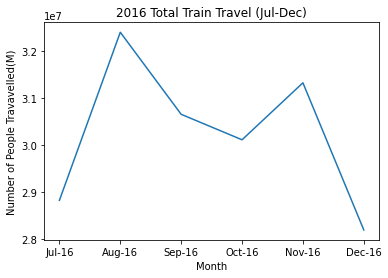

In [289]:
data_16.sum().plot()
plt.title('2016 Total Train Travel (Jul-Dec)')
plt.xlabel('Month')
plt.ylabel('Number of People Travavelled(M)');

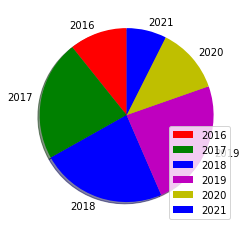

In [290]:
total = [total16,total17,total18,total19,total20,total21]
years = ['2016','2017','2018','2019','2020','2021']
color = ['r','g','b','m','y', 'b']
plt.pie(total, labels = years, colors = color, shadow = True, startangle = 90)
plt.legend()
plt.show()

<b>Observation</b>: It can be observed here that the 2016 data only collect train travel from the second half of that year. Through our observation, we conluded that the change in seasons (Aug-16 & Dec-16), total train travels has drasically increased due to the transitions in seasons. 

### 2017 Jan to December

Text(0, 0.5, 'Number of People Travavelled(M)')

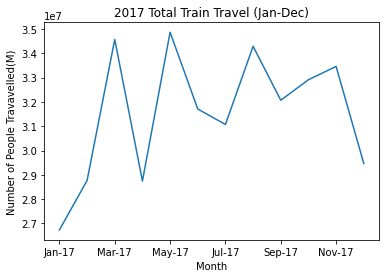

In [291]:
data_17.sum().plot() ##maybe include other months 
plt.title('2017 Total Train Travel (Jan-Dec)')
plt.xlabel('Month')
plt.ylabel('Number of People Travavelled(M)')

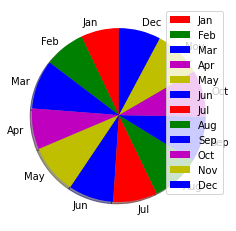

In [292]:
#2017
sum = data_17.sum()
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
color = ['r','g','b','m','y', 'b']
plt.pie(sum, labels = months, colors = color, shadow = True, startangle = 90)
plt.legend()
plt.show()

<b>Observation:</b> In comparison to 2016, the total travel train time in 2017 has signifcantly increased. However, the transition between seasons indicates that the total train travels has dips in contrast to 2016's data.

### 2018 Jan to December

Text(0, 0.5, 'Number of People Travavelled(M)')

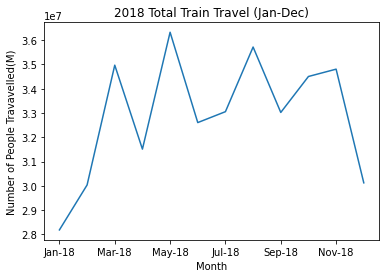

In [293]:
data_18.sum().plot()
plt.title('2018 Total Train Travel (Jan-Dec)')
plt.xlabel('Month')
plt.ylabel('Number of People Travavelled(M)')



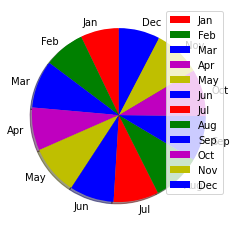

In [294]:
#2018
sum = data_18.sum()
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
color = ['r','g','b','m','y', 'b']
plt.pie(sum, labels = months, colors = color, shadow = True, startangle = 90)
plt.legend()
plt.show()

<b>Observation:</b> In the year 2018 the graph indicates a chevroned pattern where the number of passengers where more in the month of May. Travellers were seen less in April compared to other reduced months.

### 2019 Jan to December

Text(0, 0.5, 'Number of People Travavelled(M)')

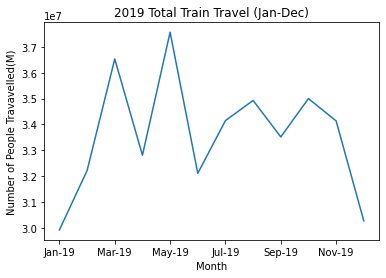

In [295]:
data_19.sum().plot()
plt.title('2019 Total Train Travel (Jan-Dec)')
plt.xlabel('Month')
plt.ylabel('Number of People Travavelled(M)')



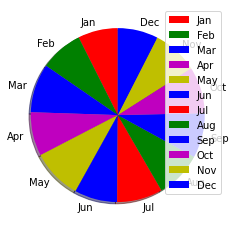

In [296]:
#2019
sum = data_19.sum()
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
color = ['r','g','b','m','y', 'b']
plt.pie(sum, labels = months, colors = color, shadow = True, startangle = 90)
plt.legend()
plt.show()

<b>Observation:</b> As per other years the graphs indicated the same amount of travellers travelling in February,May,August and October. However the amount of travellers decreased from July to rest of the year compared to first half of the year.

### 2020 Jan to December

Text(0, 0.5, 'Number of People Travavelled(M)')

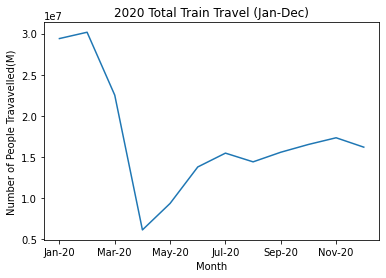

In [297]:
data_20.sum().plot()
plt.title('2020 Total Train Travel (Jan-Dec)')
plt.xlabel('Month')
plt.ylabel('Number of People Travavelled(M)')

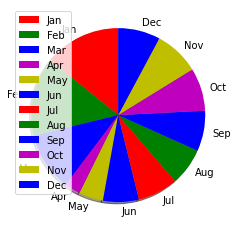

In [298]:
#2020
sum = data_20.sum()
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
color = ['r','g','b','m','y', 'b']
plt.pie(sum, labels = months, colors = color, shadow = True, startangle = 90)
plt.legend()
plt.show()

<b>Observation:</b> The year 2020 was different in regards to previous years. It is evident that the total train travel has dropped signifcantly from April and onwards. We believe that the COVID-19 pandemic had drastically changed not only the public transports industry but the rest of our society.

### 2021 Jan to Sep

Text(0, 0.5, 'Number of People Travavelled(M)')

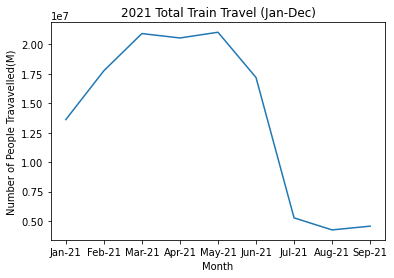

In [299]:
data_21.sum().plot()
plt.title('2021 Total Train Travel (Jan-Dec)')
plt.xlabel('Month')
plt.ylabel('Number of People Travavelled(M)')

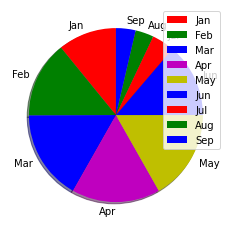

In [300]:
sum = data_21.sum()
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep']
color = ['r','g','b','m','y', 'b']
plt.pie(sum, labels = months, colors = color, shadow = True, startangle = 90)
plt.legend()
plt.show()

<b>Observation:</b> The number of passengers increased from 1.35(Mill) to more than 2.00(Mill) from January to March. <br> We believe that this was due to COVID-19 restrictions easing and our economy steadily adjusting back to pre-pandemic. <br> However, it is evident that the 2021 data from july onwards replicated the drastic dip from 2020 due to the lockdown that recently occured. 





# Bar plot analysis


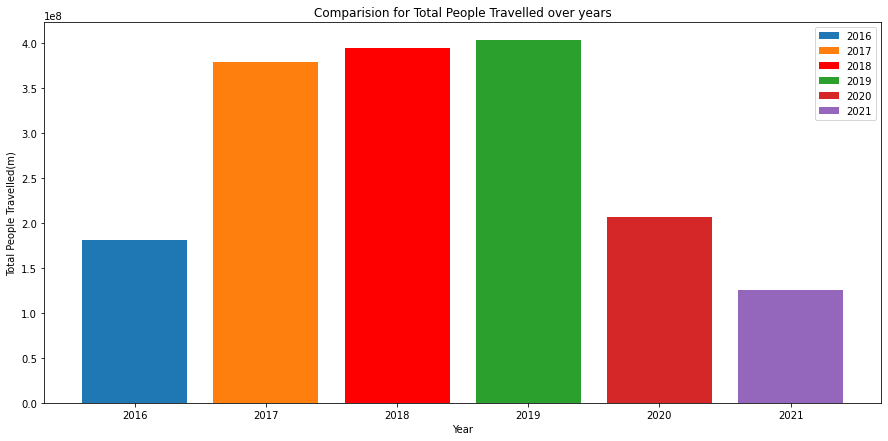

In [301]:
labels = ['2016', '2017','2018','2019','2020','2021']
plt.figure(figsize=(15,7))
plt.bar("2016", total16, align = 'center', label = '2016') 
plt.bar( "2017", total17,  align = 'center', label = '2017') 
plt.bar("2018", total18, color = 'red' ,align = 'center', label = '2018') 
plt.bar( "2019", total19,  align = 'center', label = '2019') 
plt.bar( "2020", total20, align = 'center', label = '2020') 
plt.bar( "2021", total21,  align = 'center', label = '2021') 
plt.title('Comparision for Total People Travelled over years') 
plt.ylabel('Total People Travelled(m)') 
plt.xlabel('Year') 
plt.legend()
plt.show()

### Observation

During 2016, the data provided only covered the months of July to December, resulting in a misleading data set. If statistics for the entire year had been available, it is reasonable to assume that train utilisation in 2016 would have been comparable to that in 2017-2019. There was a considerable reduction in ticket consumption between 2020 and 2021. The COVID-19 pandemic was occurring at the time, leading to the conclusion that this is a direct outcome of the virus.



In [302]:
# splitting the data by years and adding the sum of each data column
new = pd.DataFrame({
    'month': ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    '2016':[0,0,0,0,0,0,data_16['Jul-16'].sum(),data_16['Aug-16'].sum(),data_16['Sep-16'].sum(),data_16['Oct-16'].sum(),data_16['Nov-16'].sum(),data_16['Dec-16'].sum()],
    '2017':[data_17['Jan-17'].sum(),data_17['Feb-17'].sum(),data_17['Mar-17'].sum(),data_17['Apr-17'].sum(),data_17['May-17'].sum(),data_17['Jun-17'].sum(),data_17['Jul-17'].sum(),data_17['Aug-17'].sum(),data_17['Sep-17'].sum(),data_17['Oct-17'].sum(),data_17['Nov-17'].sum(),data_17['Dec-17'].sum()],
    '2018':[data_18['Jan-18'].sum(),data_18['Feb-18'].sum(),data_18['Mar-18'].sum(),data_18['Apr-18'].sum(),data_18['May-18'].sum(),data_18['Jun-18'].sum(),data_18['Jul-18'].sum(),data_18['Aug-18'].sum(),data_18['Sep-18'].sum(),data_18['Oct-18'].sum(),data_18['Nov-18'].sum(),data_18['Dec-18'].sum()],
    '2019':[data_19['Jan-19'].sum(),data_19['Feb-19'].sum(),data_19['Mar-19'].sum(),data_19['Apr-19'].sum(),data_19['May-19'].sum(),data_19['Jun-19'].sum(),data_19['Jul-19'].sum(),data_19['Aug-19'].sum(),data_19['Sep-19'].sum(),data_19['Oct-19'].sum(),data_19['Nov-19'].sum(),data_19['Dec-19'].sum()],
    '2020':[data_20['Jan-20'].sum(),data_20['Feb-20'].sum(),data_20['Mar-20'].sum(),data_20['Apr-20'].sum(),data_20['May-20'].sum(),data_20['Jun-20'].sum(),data_20['Jul-20'].sum(),data_20['Aug-20'].sum(),data_20['Sep-20'].sum(),data_20['Oct-20'].sum(),data_20['Nov-20'].sum(),data_20['Dec-20'].sum()],
    '2021':[data_21['Jan-21'].sum(),data_21['Feb-21'].sum(),data_21['Mar-21'].sum(),data_21['Apr-21'].sum(),data_21['May-21'].sum(),data_21['Jun-21'].sum(),data_21['Jul-21'].sum(),data_21['Aug-21'].sum(),data_21['Sep-21'].sum(),0,0,0]
})

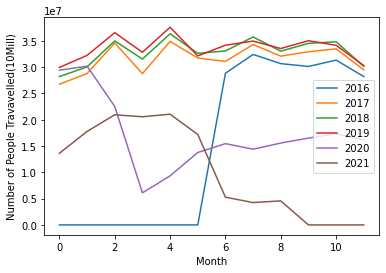

In [303]:
#ploting the data set for analysis
new.plot()
plt.xlabel('Month')
plt.ylabel('Number of People Travavelled(10Mill)')
plt.legend()

<b>Observation:</b> In the above plot it can be seen that the numbers were closely same for the years 2017 to 2019 which formed a chevroned pattern. We must also consider that in 2016, we only had data from the second half of that year. Regardless, it follow the same pattern from the upcoming years. However, train travel has instinctly broke apart from this pattern from february to may in the year 2020 but started to incline slowly for the rest of the year. In 2021 the numbers were in the mid range until the middle of the year and started to decline for the rest of the year. We can conclude that the the pandemic had a significant impact to the total travel in NSW since the introduction of the novel virus.

Text(0, 0.5, 'Number of People Travavelled(10Mill)')

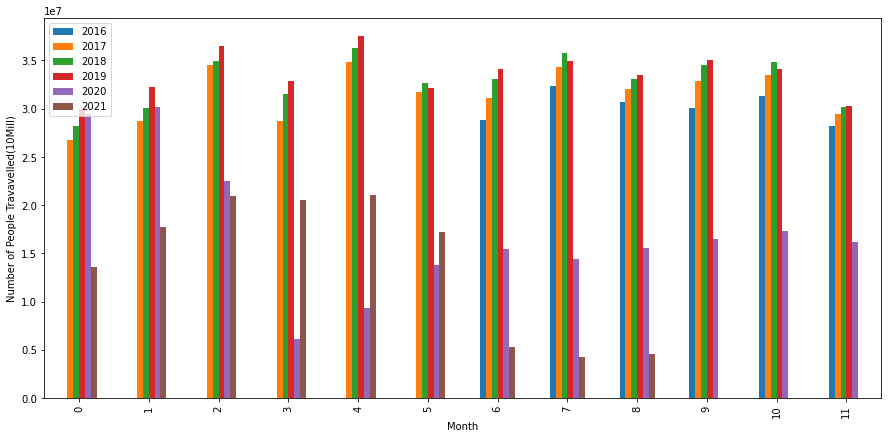

In [304]:
#Histogram comparing overall people travelled in month 
df2 = pd.DataFrame(new, columns=["month", '2016','2017','2018','2019','2020','2021'])
df2.plot.bar(figsize=(15,7));
plt.xlabel('Month')
plt.ylabel('Number of People Travavelled(10Mill)')


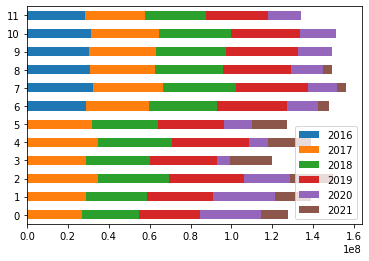

In [305]:
df2.plot.barh(stacked=True);

## Analysis 

The dataset had indicated that the majority of travels from NSW was from the Adult and concession type of opal travel. From this, we have decided to create new dataframe to calculate the total sum of each year from the each of the following travel type respectively. 
This meant that we had to repeat our data cleaning process that we have initally produced. 

In [306]:
## there are duplicate trainlines that are refering the same trainlines

data['TrainLine'] = data['Route'].str[0:2] ## targets the first two string from order date 
data['TrainLine'] = data['TrainLine'].astype('object')
data.head(25)

data['TrainLine']

0      T1
1      T1
2      T1
3      T1
4      T1
       ..
243    T9
244    T9
245    T9
246    T9
247    Gr
Name: TrainLine, Length: 248, dtype: object

## Reseting index


In [307]:
## reset index
data = data.dropna()
data = data.reset_index(drop=True)

In [308]:
data.head(1)

,Route,Travel_type,Jul-16,Aug-16,Sep-16,Oct-16,Nov-16,Dec-16,Jan-17,Feb-17,...,Jan-21,Feb-21,Mar-21,Apr-21,May-21,Jun-21,Jul-21,Aug-21,Sep-21,TrainLine
0,T1 North Shore Northern and Western Line,Adult,8575135,9484134,8956112,8778524,9221978,8036202,7774754,8446672,...,0,0,0,0,0,0,0,0,0,T1


In [309]:
df2016 = data[['TrainLine','Travel_type','Jul-16','Aug-16','Sep-16','Oct-16','Nov-16','Dec-16']]
df2017 = data[['TrainLine','Travel_type','Jan-17','Feb-17','Mar-17','Apr-17','May-17','Jun-17','Jul-17','Aug-17','Sep-17','Oct-17','Nov-17','Dec-17']]
df2018 = data[['TrainLine','Travel_type','Jan-18','Feb-18','Mar-18','Apr-18','May-18','Jun-18','Jul-18','Aug-18','Sep-18','Oct-18','Nov-18','Dec-18']]
df2019 = data[['TrainLine','Travel_type','Jan-19','Feb-19','Mar-19','Apr-19','May-19','Jun-19','Jul-19','Aug-19','Sep-19','Oct-19','Nov-19','Dec-19']]
df2020 = data[['TrainLine','Travel_type','Jan-20','Feb-20','Mar-20','Apr-20','May-20','Jun-20','Jul-20','Aug-20','Sep-20','Oct-20','Nov-20','Dec-20']]
df2021 = data[['TrainLine','Travel_type','Jan-21','Feb-21','Mar-21','Apr-21','May-21','Jun-21','Jul-21','Aug-21','Sep-21']]


In [310]:
## filtering adult coloumn 
adult16 = df2016[df2016.Travel_type == 'Adult']
adult17 = df2017[df2017.Travel_type == 'Adult']
adult18 = df2018[df2018.Travel_type == 'Adult']
adult19 = df2019[df2019.Travel_type == 'Adult']
adult20 = df2020[df2020.Travel_type == 'Adult']
adult21 = df2021[df2021.Travel_type == 'Adult']

Concession16 = df2016[df2016.Travel_type == 'Concession']
Concession17 = df2017[df2017.Travel_type == 'Concession']
Concession18 = df2018[df2018.Travel_type == 'Concession']
Concession19 = df2019[df2019.Travel_type == 'Concession']
Concession20 = df2020[df2020.Travel_type == 'Concession']
Concession21 = df2021[df2021.Travel_type == 'Concession']


In [311]:
## group by the trainline and travel type 
adult16 = adult16.groupby(['Travel_type','TrainLine'])
adult17 = adult17.groupby(['Travel_type','TrainLine'])
adult18 = adult18.groupby(['Travel_type','TrainLine'])
adult19 = adult19.groupby(['Travel_type','TrainLine'])
adult20 = adult20.groupby(['Travel_type','TrainLine'])
adult21 = adult21.groupby(['Travel_type','TrainLine'])

Concession16 = Concession16.groupby(['Travel_type','TrainLine'])
Concession17 = Concession17.groupby(['Travel_type','TrainLine'])
Concession18 = Concession18.groupby(['Travel_type','TrainLine'])
Concession19 = Concession19.groupby(['Travel_type','TrainLine'])
Concession20 = Concession20.groupby(['Travel_type','TrainLine'])
Concession21 = Concession21.groupby(['Travel_type','TrainLine'])


In [312]:
## multiple row Referring to the same trainline 

## Final sum of the tables yearly 

In [313]:
sumadult16 = adult16.sum()
sumadult17 = adult17.sum()
sumadult18 = adult18.sum()
sumadult19 = adult19.sum()
sumadult20 = adult20.sum()
sumadult21 = adult21.sum()

sumConcession16 = Concession16.sum()
sumConcession17 = Concession17.sum()
sumConcession18 = Concession18.sum()
sumConcession19 = Concession19.sum()
sumConcession20 = Concession20.sum()
sumConcession21 = Concession21.sum()

## final table that has the total adult table with yearly total 

## Total Adult Travel 2021

In [314]:
sumadult21

Jan-21   Feb-21   Mar-21   Apr-21   May-21   Jun-21  \
Travel_type TrainLine                                                         
Adult       Bl          191587   215611   248167   267221   243592   218192   
            Ce          306328   400043   456765   474845   478407   364493   
            Hu           15693    19030    19000    21817    22552    18955   
            So          194022   231817   268885   258594   272613   216014   
            St               0        0        0        0        0        0   
            T1         2072890  2732176  3186268  3139610  3270742  2671322   
            T2         1265795  1531228  1798040  1642978  1600892  1494399   
            T3          639096   781137   851759   850934   846030   706701   
            T4         1538773  1713603  1982189  1856641  1937118  1596551   
            T5          201514   293372   284364   279616   305354   244406   
            T6            5673     6984     8548     7824     8229     7560   
            T7           19725    29285    37870    65358    48087    51312   
            T8          827040  1028685  1228446  1195959  1203356   999705   
            T9          591055   698236   772130   790858   846242   618143   

                       Jul-21  Aug-21  Sep-21  
Travel_type TrainLine                          
Adult       Bl          73486   51628   54772  
            Ce         115111   91711   92176  
            Hu          13904    6379    4551  
            So          65771   56574   54467  
            St              0       0       0  
            T1         922742  744936  789155  
            T2         559423  449097  479690  
            T3         208600  198920  231984  
            T4         631262  530477  534231  
            T5         100527   62668   71368  
            T6           3908    3310    4102  
            T7          25498   35077   33909  
            T8         362972  255058  269797  
            T9         220326  187027  194425

## Total Concession Travel 2021

In [315]:
sumConcession21

Jan-21  Feb-21  Mar-21  Apr-21  May-21  Jun-21  Jul-21  \
Travel_type TrainLine                                                           
Concession  Bl          14093   20488   34830   29678   28821   20729    3274   
            Ce          27603   44189   75823   61827   68375   40290    6683   
            Hu           2066    3834    7063    5815    7781    3289    2510   
            So          14634   22587   37549   30148   33217   22117    3618   
            St              0       0       0       0       0       0       0   
            T1         174608  279788  458033  366573  382740  261707   51850   
            T2         100849  161106  252608  188122  185025  151407   25580   
            T3          50544   84021  125427  103522  100372   73846   10789   
            T4         108039  145573  215502  171811  181152  133337   30578   
            T5          14194   29189   42656   33213   36245   23978    3587   
            T6            421     543     803     694     732     642     238   
            T7           1121    2042    3669    6312    4302    4321    1061   
            T8          65615  102730  157702  123187  125765   93683   19999   
            T9          55153   84507  129248  106726  114341   72774   12120   

                       Aug-21  Sep-21  
Travel_type TrainLine                  
Concession  Bl           2023    2095  
            Ce           4640    4599  
            Hu            905     527  
            So           3215    2800  
            St              0       0  
            T1          38330   39946  
            T2          16866   18259  
            T3           9501   10790  
            T4          23371   24111  
            T5           1315    1654  
            T6            178     134  
            T7           1745    1595  
            T8          11707   12947  
            T9           8798    8911

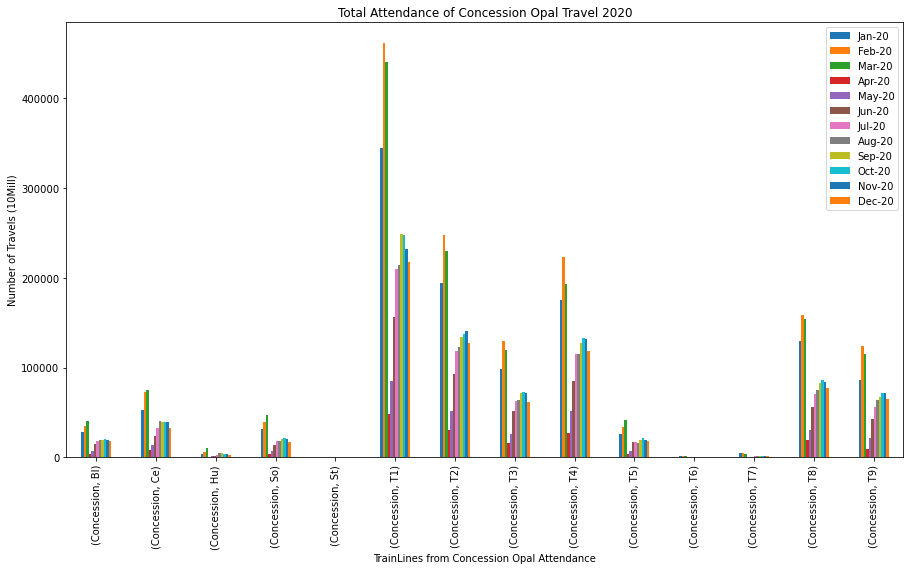

In [323]:
plot = sumConcession20.plot(kind='bar',figsize=(15,8), title="Total Attendance of Concession Opal Travel 2020")

plot.set_xlabel("TrainLines from Concession Opal Attendance")
plot.set_ylabel("Number of Travels (10Mill)")
plot.legend()

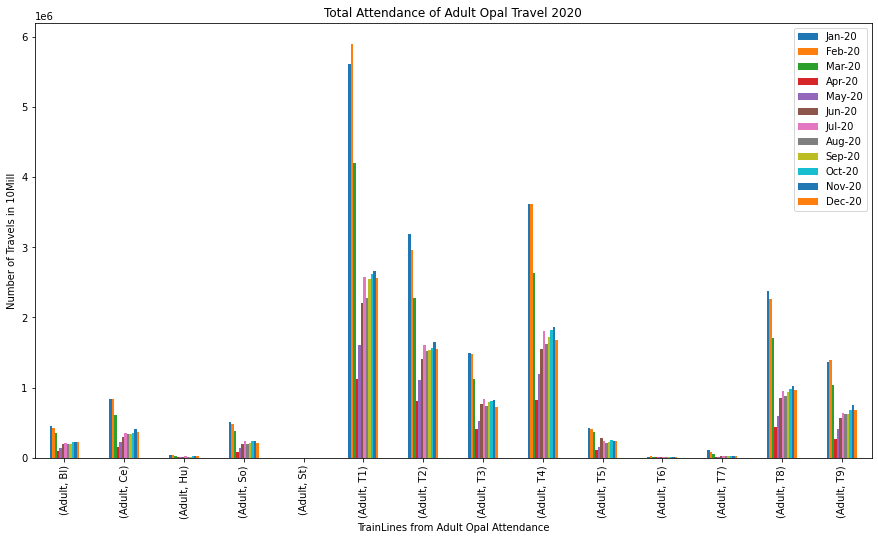

In [324]:
plot = sumadult20.plot(kind='bar',figsize=(15,8), title="Total Attendance of Adult Opal Travel 2020")

plot.set_xlabel("TrainLines from Adult Opal Attendance")
plot.set_ylabel("Number of Travels in 10Mill")
plot.legend()

Text(0, 0.5, 'Number of Travels (10Mill)')

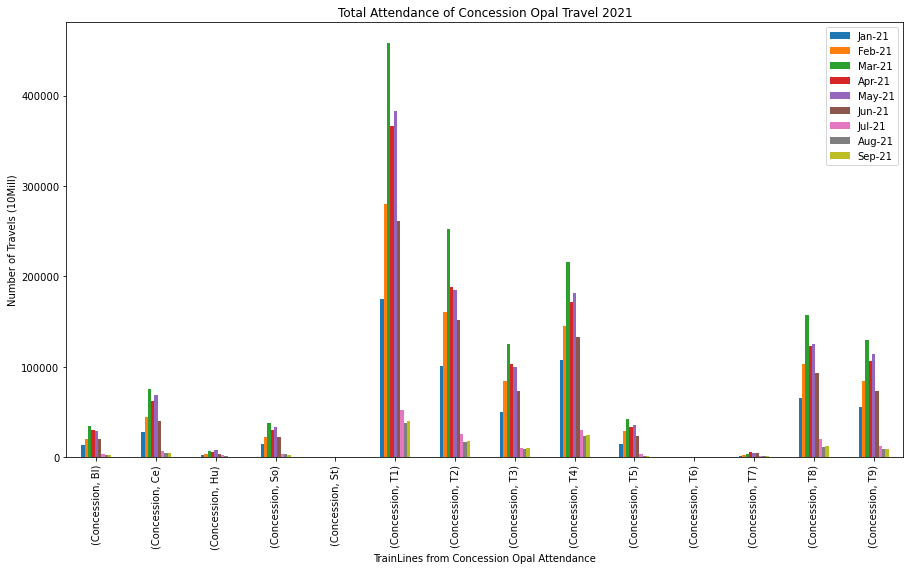

In [325]:
plot = sumConcession21.plot(kind='bar',figsize=(15,8), title="Total Attendance of Concession Opal Travel 2021",)
plot.set_xlabel("TrainLines from Concession Opal Attendance")
plot.set_ylabel("Number of Travels (10Mill)")


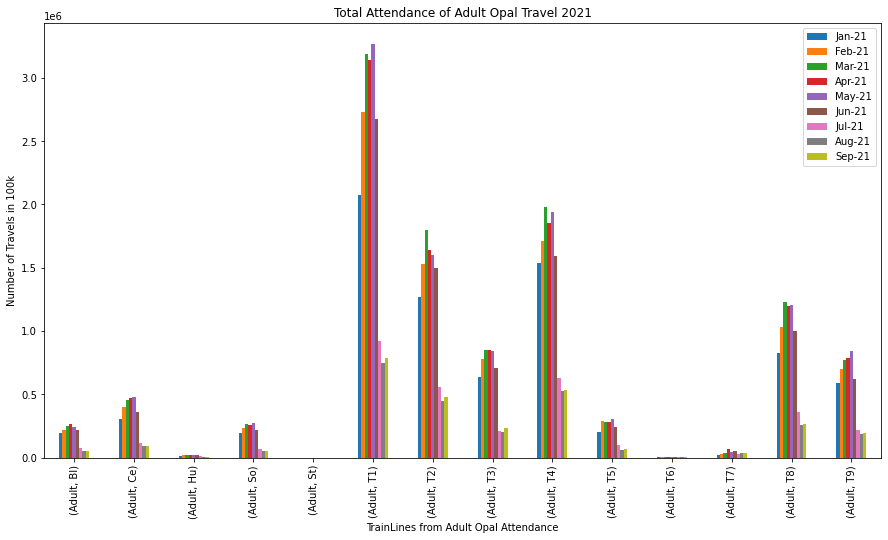

In [319]:
plot = sumadult21.plot(kind='bar',figsize=(15,8), title="Total Attendance of Adult Opal Travel 2021")

plot.set_xlabel("TrainLines from Adult Opal Attendance")
plot.set_ylabel("Number of Travels in 100k")
plot.legend()

## Observation 

Through our observation, we can conclude that both travel type from adult and concession had similar characteristics in regards to total trainline attendance. We can assume that due to the population size of Sydney compared to the rest of the state that total travel attendance are centered between T1, T2, T3 and T4. We concluded that this is due trainline being located in major metropolitan areas.

## Linear Regression

In [320]:
# Initalise train and test variable 
train, test = train_test_split(data, test_size = 0.2, random_state=142)
print(train.shape)
print(test.shape)

(198, 66)
(50, 66)


In [321]:
reg = linear_model.LinearRegression()
X_train = train[['Dec-18', 'Dec-19']]
y_train = train['Dec-20']
X_test = test[['Dec-18', 'Dec-19']]
y_test = test['Dec-20']
reg.fit(X_train, y_train)
print("y = x *", reg.coef_, "+", reg.intercept_) 

y = x * [-0.15352069  0.60015968] + 9970.929169814655


In [322]:
predicted = reg.predict(X_test)
mse = ((np.array(y_test)-predicted)**2).sum()/len(y_test)
r2 = r2_score(y_test, predicted)
print("MSE:", mse) ##mean square error if it's too low means its good
print("R Squared:", r2) 

MSE: 138840440185.64987
R Squared: 0.9728672644240629


<b>Observation</b> Here the acutal value refers to the usage of tickets in 2021 and the predicted value is the numbers for the next year. The numbers predict less for the upcoming year as the travel decresed due to global pandemic gradually.

Shown by the predictive R-Squared, while there is a correlation between the two variables indicating that the probability is highly accurate. We cannot soley rely on past records to forecast the future, therefore, our regression model is bias and we cannot rely on linear regression to predict future outcomes by only past records. <br>
The process of obtaining one observation does not affect the process of obtaining the next observations (independence) past records. <br>
We will now move on to an analysis with mltinomial naive bayes below in order to forecast the future.




-  There are no apparent curves in the plots which means the model is linear in the parameters and its residuals.
-  The process of obtaining one observation does not affect the process of obtaining the next observations (independence).
-  Why the r square is close to 1, the model is bias and we cannot rely on a regression to predict future outcome by past records


### Multinomial naive bayes will be implemented below in order to see if it can predict past records.

In [235]:
#---creating a new dataframe with the relevant datasets
dftest = data[['Dec-18','Dec-19','Dec-20']]

#---dropping null values and resetting the index
dftest = dftest.dropna()
dftest = dftest.reset_index(drop=True)

# Performing a multinomial naive bayes analysis on the data

we wil  create a naive bayes analysis function to allow us to perform the analysis in a modular manner below


In [236]:
#---performing a multinomial naive bayes analysis on the data
clf = MultinomialNB()
data = dftest[['Dec-18','Dec-19']]
target = dftest[['Dec-20']]
X_train, X_test, y_train, y_test = train_test_split(data, target, train_size = 0.70, random_state=0)

y_train=y_train.values
clf.fit (X_train, y_train)

y_test=y_test.values
y_pred = clf.predict(X_test)

print("Multinomial:", np.mean(y_pred==y_test))

Multinomial: 0.058133333333333335


/Users/ryanlam/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### Observation
Similar to our linear regression model, the results from our naive bayes analysis is poor in the context of the data, though there is some level of prediction to be made. Similar the regression, naive bayes uses similar methods to predict the probabbility of an event occuring based on various aspects in an attribute.
<br> This means is that past records from previous year can change due to external circumstances for example, due to the covid pandemic, the sum of train attendance has staggared in comparison to previous years


In [237]:
# Explore the learned model parameters (probabilities)
# Note that the probabilities are in the logorithmic form. Why? The log-sum-exp trick for underflow of probability products
print('Estimated probability of classess: \n', np.e**clf.class_log_prior_)
print('Estimated class-conditional probabilities for each feature: \n', np.e**clf.feature_log_prob_)

Estimated probability of classess: 
 [0.30057803 0.01734104 0.00578035 0.00578035 0.00578035 0.00578035
 0.00578035 0.01156069 0.00578035 0.00578035 0.00578035 0.00578035
 0.00578035 0.00578035 0.00578035 0.00578035 0.00578035 0.00578035
 0.00578035 0.00578035 0.00578035 0.00578035 0.00578035 0.00578035
 0.00578035 0.00578035 0.00578035 0.00578035 0.00578035 0.00578035
 0.00578035 0.00578035 0.00578035 0.00578035 0.00578035 0.00578035
 0.00578035 0.00578035 0.00578035 0.00578035 0.00578035 0.00578035
 0.00578035 0.00578035 0.00578035 0.00578035 0.00578035 0.00578035
 0.00578035 0.00578035 0.00578035 0.00578035 0.00578035 0.00578035
 0.00578035 0.00578035 0.00578035 0.00578035 0.00578035 0.00578035
 0.00578035 0.00578035 0.00578035 0.00578035 0.00578035 0.00578035
 0.00578035 0.00578035 0.00578035 0.00578035 0.00578035 0.00578035
 0.00578035 0.00578035 0.00578035 0.00578035 0.00578035 0.00578035
 0.00578035 0.00578035 0.00578035 0.00578035 0.00578035 0.00578035
 0.00578035 0.00578035 0.

# steevan's model  

# making predection using time series

In [110]:
from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from statsmodels.tsa.arima_model import ARIMA

In [83]:
times = pd.DataFrame({
    'Month': ['2016-07','2016-08','2016-09','2016-10','2016-11','2016-12','2017-01','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07','2017-08','2017-09','2017-10','2017-11','2017-12','2018-01','2018-02','2018-03','2018-04','2018-05','2018-06','2018-07','2018-08','2018-09','2018-10','2018-11','2018-12','2019-01','2019-02','2019-03','2019-04','2019-05','2019-06','2019-07','2019-08','2019-09','2019-10','2019-11','2019-12','2020-01','2020-02','2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2016-20','2020-10','2020-11','2020-12','2021-01','2021-02','2021-03','2021-04','2021-05','2021-06','2021-07','2021-08','2021-09'],
    'Travelled':[data_16['Jul-16'].sum(),data_16['Aug-16'].sum(),data_16['Sep-16'].sum(),data_16['Oct-16'].sum(),data_16['Nov-16'].sum(),data_16['Dec-16'].sum(),data_17['Jan-17'].sum(),data_17['Feb-17'].sum(),data_17['Mar-17'].sum(),data_17['Apr-17'].sum(),data_17['May-17'].sum(),data_17['Jun-17'].sum(),data_17['Jul-17'].sum(),data_17['Aug-17'].sum(),data_17['Sep-17'].sum(),data_17['Oct-17'].sum(),data_17['Nov-17'].sum(),data_17['Dec-17'].sum(),data_18['Jan-18'].sum(),data_18['Feb-18'].sum(),data_18['Mar-18'].sum(),data_18['Apr-18'].sum(),data_18['May-18'].sum(),data_18['Jun-18'].sum(),data_18['Jul-18'].sum(),data_18['Aug-18'].sum(),data_18['Sep-18'].sum(),data_18['Oct-18'].sum(),data_18['Nov-18'].sum(),data_18['Dec-18'].sum(),data_19['Jan-19'].sum(),data_19['Feb-19'].sum(),data_19['Mar-19'].sum(),data_19['Apr-19'].sum(),data_19['May-19'].sum(),data_19['Jun-19'].sum(),data_19['Jul-19'].sum(),data_19['Aug-19'].sum(),data_19['Sep-19'].sum(),data_19['Oct-19'].sum(),data_19['Nov-19'].sum(),data_19['Dec-19'].sum(),data_20['Jan-20'].sum(),data_20['Feb-20'].sum(),data_20['Mar-20'].sum(),data_20['Apr-20'].sum(),data_20['May-20'].sum(),data_20['Jun-20'].sum(),data_20['Jul-20'].sum(),data_20['Aug-20'].sum(),data_20['Sep-20'].sum(),data_20['Oct-20'].sum(),data_20['Nov-20'].sum(),data_20['Dec-20'].sum(),data_21['Jan-21'].sum(),data_21['Feb-21'].sum(),data_21['Mar-21'].sum(),data_21['Apr-21'].sum(),data_21['May-21'].sum(),data_21['Jun-21'].sum(),data_21['Jul-21'].sum(),data_21['Aug-21'].sum(),data_21['Sep-21'].sum()]
})

In [84]:
dft = pd.DataFrame(times,columns=['Month','Travelled'])

In [86]:
#checking
dft

,Month,Travelled
0,2016-07,28819249
1,2016-08,32393980
2,2016-09,30648352
3,2016-10,30106833
4,2016-11,31318279
...,...,...
58,2021-05,21038609
59,2021-06,17193476
60,2021-07,5268833
61,2021-08,4245889


<AxesSubplot:xlabel='Month'>

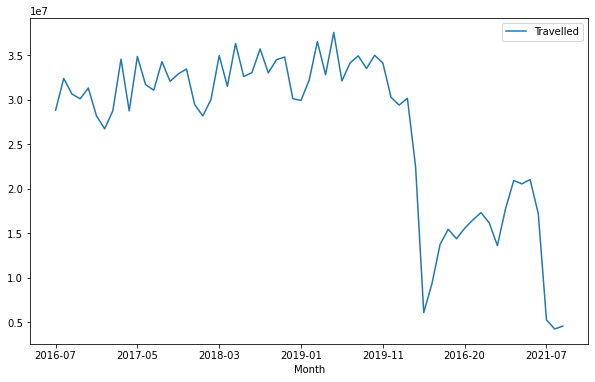

In [87]:
dft.plot(x='Month',y='Travelled',kind ='line',figsize =(10,6))

# add more
We can see that our data having increasing trend.


## ADF Test

In [88]:
def adfuller_test(df):
    result=adfuller(df)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("stationary")
    else:
        print("non-stationary ")

In [89]:
adfuller_test(dft['Travelled'])

ADF Test Statistic : -0.8549955648608684
p-value : 0.8024316903443076
#Lags Used : 0
Number of Observations Used : 62
non-stationary 


As our time series data is non stationary by using differncing method i.e taking difference between previous observation from current observation. so lets go to take first differnce

In [90]:
dft['First_Difference'] = dft.Travelled.diff()
dft.head()

,Month,Travelled,First_Difference
0,2016-07,28819249,NaN
1,2016-08,32393980,3574731.0
2,2016-09,30648352,-1745628.0
3,2016-10,30106833,-541519.0
4,2016-11,31318279,1211446.0


In [91]:
dft=dft.fillna(0)

In [93]:
dft.head()

,Month,Travelled,First_Difference
0,2016-07,28819249,0.0
1,2016-08,32393980,3574731.0
2,2016-09,30648352,-1745628.0
3,2016-10,30106833,-541519.0
4,2016-11,31318279,1211446.0


again we check is it our data is stationary after taking the first difference .

In [94]:
adfuller_test(dft['First_Difference'])

ADF Test Statistic : -8.315206051808838
p-value : 3.696717091834152e-13
#Lags Used : 0
Number of Observations Used : 62
stationary


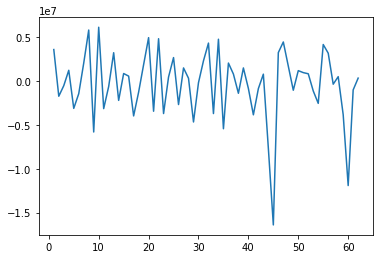

In [95]:
plt.plot(dft.Travelled.diff())

# PACF plot

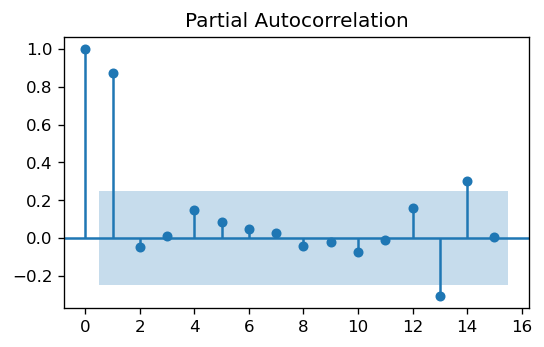

In [96]:
plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':120})


from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(dft.Travelled,lags=15);

In [97]:
X=dft.First_Difference.values
Y=dft.Travelled.values

In [98]:
from sklearn.model_selection import train_test_split
training_x,test_x,training_y,test_y=train_test_split(X,Y,test_size=0.3,random_state=0)

In [99]:
training_x=training_x.reshape(-1,1)
test_x=test_x.reshape(-1,1)

In [102]:
linear_reg=LinearRegression()
linear_reg.fit(training_x,training_y)

LinearRegression()

In [103]:
pred_y=linear_reg.predict(test_x)

In [104]:
linear_reg.coef_

array([0.35498231])

In [105]:
linear_reg.intercept_

27329819.95859071

In [108]:
print(np.sqrt(metrics.mean_squared_error(test_y,pred_y)))

10778735.778679833


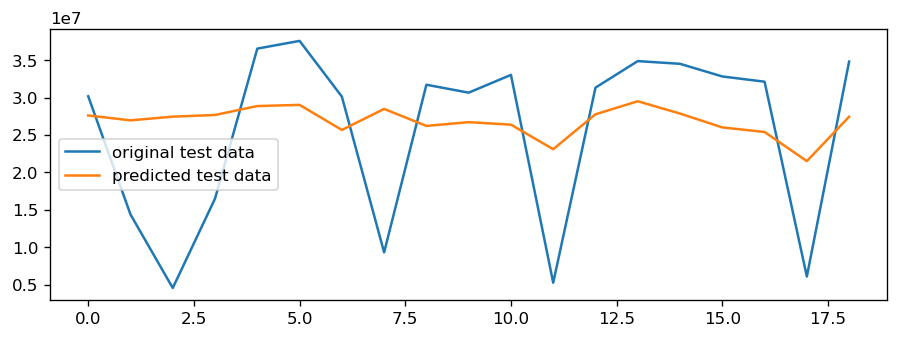

In [109]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

plt.plot(test_y,label="original test data")
plt.plot(pred_y,label="predicted test data")
plt.legend()
plt.show()

In [111]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(dft['Travelled'],order=(1,0,0))
model_fit=model.fit()

C:\Users\thuse\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [112]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              Travelled   No. Observations:                   63
Model:                     ARMA(1, 0)   Log Likelihood               -1046.643
Method:                       css-mle   S.D. of innovations        3909209.652
Date:                Wed, 03 Nov 2021   AIC                           2099.285
Time:                        00:45:55   BIC                           2105.715
Sample:                             0   HQIC                          2101.814
                                                                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.682e+07   6.06e+06      4.429      0.000     1.5e+07    3.87e+07
ar.L1.Travelled     0.9273      0.053     17.498      0.000       0.823       1.031
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0785           +0.0000j            1.0785            0.0000
-----------------------------------------------------------------------------
"""

In [113]:
forecasted=model_fit.forecast(steps=300)
forecasted

(array([ 6185164.35402196,  7686652.25535565,  9078908.62525756,
        10369879.93299218, 11566934.55125293, 12676904.81202805,
        13706126.00295019, 14660472.52670611, 15545391.42989057,
        16365933.49267432, 17126782.05673427, 17832279.75598465,
        18486453.30267791, 19093036.47034515, 19655491.40475378,
        20177028.3845174 , 20660624.14414379, 21109038.86410215,
        21524831.92488223, 21910376.51496378, 22267873.17607271,
        22599362.3630355 , 22906736.08991842, 23191748.72892346,
        23456027.02367685, 23701079.37406236, 23928304.44559348,
        24138999.15246366, 24334366.05983871, 24515520.24764093,
        24683495.67500069, 24839251.08170154, 24983675.46030179,
        25117593.13016561, 25241768.44236408, 25356910.14230007,
        25463675.41495715, 25562673.6358613 , 25654469.84916434,
        25739587.99270084, 25818513.88842577, 25891698.01530129,
        25959558.08045908, 26022481.40331368, 26080827.12623419,
        26134928.26439219

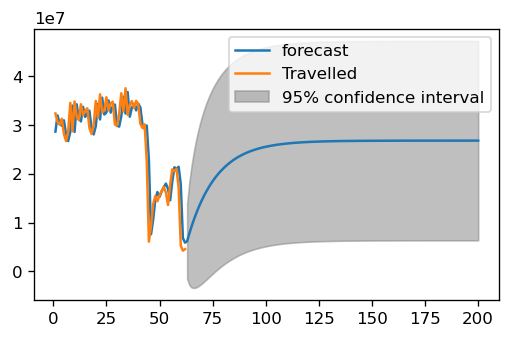

In [114]:
plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':120})
model_fit.plot_predict(1,200);

## Conclusion

Restating our project goals:
- Explore with our chosen dataframe.
- Take advantage of the various sources to reach an optimal conclusion that will help with either decision making/support.
- Provide analysis that will enable us to correlate trends/patterns withreal world activities which will include:
  - Distinction between an array of transportation rush hours
  - In which month people travel more
  - Analysis through outliners
  - Analysis through several linear Regresion.
  
Due to the diverse amount of vogue data we had to clean the data thoroughly to start exploring the data. In the exploration    process we found out the content of the data such as train routes and different travel types. These data where separated in order to carry on further analysis

The first analysis was done by spliting the data in to indiviual years. Then using those data we could understand the trends of travelling in each month for the respectable year through line graphs. In the analysis we were able to distinguish when more  people  intented to travel  through train. The second analysis was quite similer but the pie plot was used indicate total people travelling throughout the year.

Moreover linear regression were used to predict the travel usuage by train for future. However we cant entirely rely on past records to predict the future and need to consider external factors such as the pandemic. Another regression was done to find the usage of  ticket all over the years in order to predict the usage in the future.


Lastly predicting the numbers of travels and passengers, ticket usage is difficult to predict acurately thus given a limited data frrame. Moreover it lacked a major chunk of data and is unable to predict for future based on the running pandemic situation. Nertheless we were able to uphold some analysis.
